In [3]:
# %matplotlib widget 
%reload_ext autoreload
%autoreload 2

import numpy as np
from functools import partial
# from pdb import set_trace

from update_2d import run_exp #, update_w
from plot_custom import plot_all#, plot_3d
from landscape_loss import landscape

from pdb import set_trace
# w_rng = np.random.default_rng()

In [4]:

def print_str():
    legend = ['SGD', 'NGD', 'sNGD']

    for q in qs[3:]:
        legend.append('q = '+str(q))
    print('w0 = ', w0, ' lr = ', lrs, ' noise = ', noise, ' seed = ', seed)
    
    return legend


def run_all(fnc = None, eps=0.1, iter = 100, idx = 0, OED_solver = None, rotate=False, Block_diag = False):
    if fnc is None:
        fnc = partial(landscape, freq = None, amp = None, py = np, noise = noise, seed = seed)

    legend = print_str()
    l_alls, w_alls, w_range = run_exp(fnc, w0, qs, lrs, dampings = dampings, iter = iter, OED_solver = OED_solver, Block_diag = Block_diag)
    plot_all (fnc, l_alls, w_alls, w_range, legend, q = qs[idx], damping = dampings[idx], eps = epss[idx], rotate=rotate, Block_diag = Block_diag) # plot_type = 'imshow')
    return l_alls, w_alls

# Quadratic loss

w0 =  [  0. -10.]  lr =  [0.256 2.4   1.2  ]  noise =  (0.1,)  seed =  42


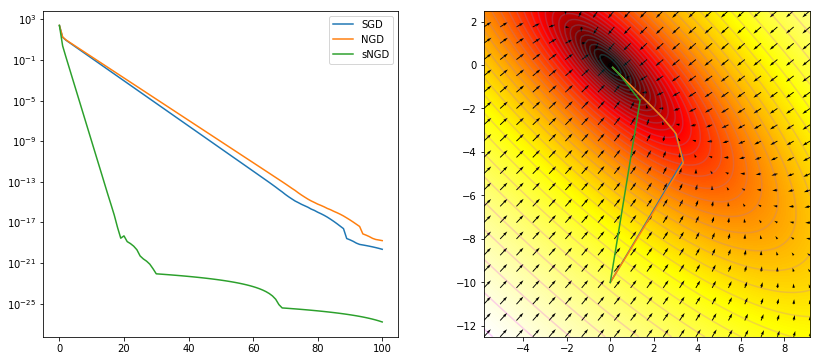

In [11]:

def shallownet_2d(w, A = np.array([[1,2],[2,1]]) ):
    f = A @ w             # input-output map
    j = A.T                 # Jacobian of map
    err = f - 0           # target = 0
    loss = (err ** 2 /2).sum(axis=0)
    if len(w.shape)==2:
        j = np.repeat(j.reshape(2,2,-1), w.shape[1], axis=2)
    return loss, err, j 

qs = [0, 1, 0.5]
noise = 0.1, 
lrs = np.array([0.0016*4, 0.06, 0.03])*40
dampings = [0, 0, 0]
w0 = np.array([0,-10.0]) 
seed=42
epss = [1e-15,1e-15,1e-15]

l_alls, w_alls = run_all(fnc = shallownet_2d, iter = 100, idx = 1, OED_solver = 'odeint', rotate = False)

#  w_all.shape
# (101, 2)

# DeepNet Loss

w0 =  [0.2  0.02]  lr =  [0.064 0.6   0.08 ]  noise =  (0.1,)  seed =  None


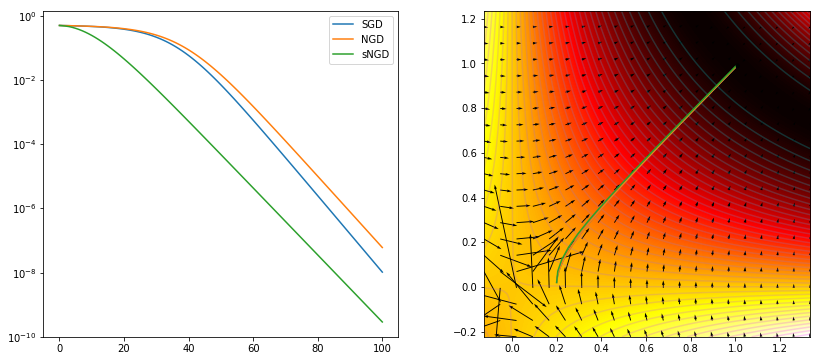

In [5]:

def deepnet_2d(w ):
    w1, w2 = w
    f =  w2 * w1          # input-output map
    j = np.expand_dims(np.array([w2, w1]),1) #.reshape([2,1,-1])     # Jacobian of map : shape [2, 1, batch]
    err = np.expand_dims(f - 1 , 0)           # target = 0
    loss = (err ** 2 /2).sum(axis=0)
    return loss, err, j 

seed = None
noise = 0.1, 
lrs = np.array([0.016*4, 0.6, 0.08])*1
dampings = [0, 0, 0]
epss = [1000,1000,1000]
qs = [0.0, 1.0, 0.5]; 
w0 = np.array([0.2, 0.02]) 
l_alls, w_alls = run_all(fnc = deepnet_2d, iter = 100, idx = 1, OED_solver = None, rotate = False)
# l_alls, w_alls = run_all(fnc = deepnet_2d, iter = 100, idx = 1, OED_solver = 'odeint', rotate = False)

#  w_all.shape
# (101, 2)

# DeepNet - Block Diagonal

w0 =  [0.2  0.02]  lr =  [0.064 0.3   0.2  ]  noise =  (0.1,)  seed =  None


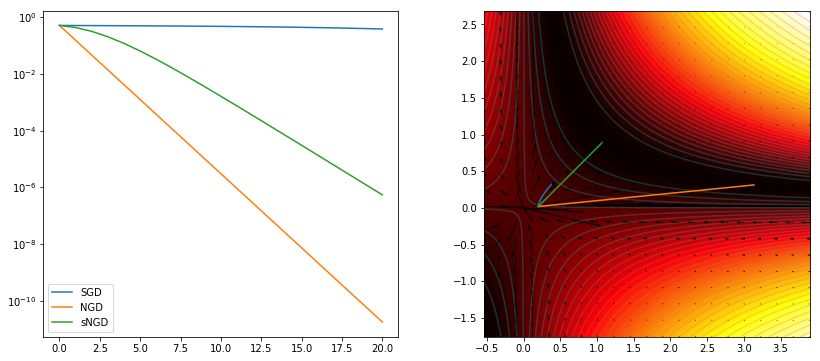

In [13]:

# def deepnet_bd(w ):
#     w1, w2 = w
#     f =  w2 * w1          # input-output map
#     j = np.array([[w2, np.zeros(w2.shape)],[np.zeros(w1.shape), w1]]) #.reshape([2,1,-1])     # Jacobian of map : shape [2, 1, batch]
#     print(j.shape)
#     err = np.expand_dims(f - 1 , 0)           # target = 0
#     loss = (err ** 2 /2).sum(axis=0)
#     return loss, err, j 

noise = 0.1, 
lrs = np.array([0.016*4, 0.3, 0.2])*1
dampings = [0, 0, 0]
epss = [1000,1000,1000]

w0 = np.array([0.2, 0.02]) 

l_alls, w_alls = run_all(fnc = deepnet_2d, iter = 20, idx = 1, OED_solver = 'odeint', rotate = False, Block_diag = True)

#  w_all.shape
# (101, 2)

w0 =  [0.2  0.02]  lr =  [0.064 0.6   0.08 ]  noise =  (0.1,)  seed =  None


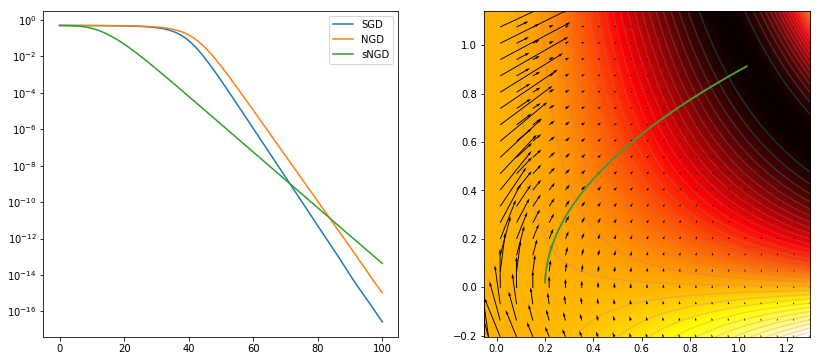

In [14]:

def deepnet_2d_mixed(w ):
    w1, w2 = w
    f =  w2 * w1 **2         # input-output map
    j = np.expand_dims(np.array([w2*w1*2, w1**1]),1) #.reshape([2,1,-1])     # Jacobian of map : shape [2, 1, batch]
    err = np.expand_dims(f - 1 , 0)           # target = 0
    loss = (err ** 2 /2).sum(axis=0)
    return loss, err, j 

noise = 0.1, 
lrs = np.array([0.016*4, 0.6, 0.08])*1
dampings = [0, 0, 0]
epss = [1000,1000,1000]

w0 = np.array([0.2, 0.02]) 

l_alls, w_alls = run_all(fnc = deepnet_2d_mixed, iter = 100, idx = 1, OED_solver = 'odeint', rotate = False)

#  w_all.shape
# (101, 2)

In [40]:
w_alls[0].shape


(2, 101)

# Play time!!

In [5]:
from fastai.vision import plt

seed = 6107 
eps = 0.1
fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
w_range = [0,1]

x_grid = np.linspace(0, 10, 31)
fig = plt.figure(figsize=(8,8))
# plot_3d(fig, fnc, x_grid)

# np.einsum('ijk,jlk->ilk',array(z_sc),array(sc_y))

<Figure size 576x576 with 0 Axes>

w0 =  [4.184525 4.597896]  lr =  [0.0004 0.0125 0.0075]  noise =  0  seed =  6107
At input vector:  [4.184525 4.597896]
Landscape returning Jacobian:  [[ -3.548378  28.623698]
 [ -2.804393 -28.237896]]
At input vector:  [3.935773 4.927484]
Landscape returning Jacobian:  [[ 10.437955  29.730535]
 [-14.448774 -19.052295]]
At input vector:  [3.68796  5.178389]
Landscape returning Jacobian:  [[ 24.418389  21.781374]
 [-19.719054  -6.381779]]
At input vector:  [3.479041 5.344623]
Landscape returning Jacobian:  [[ 32.005459   8.884218]
 [-19.081432   4.511076]]
At input vector:  [3.340648 5.438528]
Landscape returning Jacobian:  [[ 33.435405  -1.455616]
 [-16.378437  10.930994]]
At input vector:  [3.26725  5.485519]
Landscape returning Jacobian:  [[ 32.825006  -7.086968]
 [-14.304305  13.910242]]
At input vector:  [3.233123 5.508191]
Landscape returning Jacobian:  [[ 32.183761  -9.703402]
 [-13.184595  15.182005]]
At input vector:  [3.218372 5.519548]
Landscape returning Jacobian:  [[ 31.804

At input vector:  [3.23897  5.587232]
Landscape returning Jacobian:  [[ 30.497165 -11.713812]
 [-11.843658  15.585381]]
At input vector:  [3.239033 5.587345]
Landscape returning Jacobian:  [[ 30.495282 -11.713678]
 [-11.842984  15.584326]]
At input vector:  [3.239093 5.587455]
Landscape returning Jacobian:  [[ 30.493462 -11.71355 ]
 [-11.842331  15.583305]]
At input vector:  [3.239152 5.587561]
Landscape returning Jacobian:  [[ 30.491703 -11.713425]
 [-11.841701  15.582318]]
At input vector:  [3.239208 5.587664]
Landscape returning Jacobian:  [[ 30.490002 -11.713305]
 [-11.841092  15.581364]]
At input vector:  [3.239263 5.587763]
Landscape returning Jacobian:  [[ 30.488357 -11.713189]
 [-11.840503  15.580442]]
At input vector:  [3.239316 5.587859]
Landscape returning Jacobian:  [[ 30.486767 -11.713076]
 [-11.839933  15.57955 ]]
At input vector:  [3.239367 5.587952]
Landscape returning Jacobian:  [[ 30.48523  -11.712968]
 [-11.839383  15.578688]]
At input vector:  [3.239417 5.588041]
La

At input vector:  [3.240778 5.590506]
Landscape returning Jacobian:  [[ 30.442874 -11.70997 ]
 [-11.824238  15.554922]]
At input vector:  [3.240781 5.590511]
Landscape returning Jacobian:  [[ 30.442789 -11.709964]
 [-11.824208  15.554874]]
At input vector:  [3.240784 5.590516]
Landscape returning Jacobian:  [[ 30.442706 -11.709958]
 [-11.824178  15.554828]]
At input vector:  [3.240786 5.590521]
Landscape returning Jacobian:  [[ 30.442626 -11.709952]
 [-11.82415   15.554783]]
At input vector:  [3.240789 5.590526]
Landscape returning Jacobian:  [[ 30.442548 -11.709947]
 [-11.824122  15.554739]]
At input vector:  [3.240791 5.59053 ]
Landscape returning Jacobian:  [[ 30.442473 -11.709942]
 [-11.824095  15.554697]]
At input vector:  [3.240794 5.590535]
Landscape returning Jacobian:  [[ 30.442401 -11.709937]
 [-11.824069  15.554656]]
At input vector:  [3.240796 5.590539]
Landscape returning Jacobian:  [[ 30.442331 -11.709932]
 [-11.824044  15.554617]]
At input vector:  [3.240798 5.590543]
La

At input vector:  [3.240861 5.590656]
Landscape returning Jacobian:  [[ 30.440393 -11.709794]
 [-11.823353  15.55353 ]]
At input vector:  [3.240861 5.590656]
Landscape returning Jacobian:  [[ 30.44039  -11.709794]
 [-11.823352  15.553528]]
At input vector:  [3.240861 5.590656]
Landscape returning Jacobian:  [[ 30.440386 -11.709794]
 [-11.82335   15.553525]]
At input vector:  [3.240861 5.590656]
Landscape returning Jacobian:  [[ 30.440382 -11.709794]
 [-11.823349  15.553523]]
At input vector:  [3.240861 5.590657]
Landscape returning Jacobian:  [[ 30.440379 -11.709793]
 [-11.823348  15.553521]]
At input vector:  [3.240861 5.590657]
Landscape returning Jacobian:  [[ 30.440375 -11.709793]
 [-11.823346  15.553519]]
At input vector:  [3.240861 5.590657]
Landscape returning Jacobian:  [[ 30.440372 -11.709793]
 [-11.823345  15.553518]]
At input vector:  [3.240862 5.590657]
Landscape returning Jacobian:  [[ 30.440369 -11.709793]
 [-11.823344  15.553516]]
At input vector:  [3.240862 5.590657]
La

Landscape returning Jacobian:  [[  9.57419   12.178393]
 [-12.59745  -15.391224]]
At input vector:  [4.41241  5.569993]
Landscape returning Jacobian:  [[  9.741987  12.055629]
 [-12.7179   -15.107145]]
At input vector:  [4.407821 5.582789]
Landscape returning Jacobian:  [[  9.908992  11.930603]
 [-12.834305 -14.822777]]
At input vector:  [4.403182 5.595542]
Landscape returning Jacobian:  [[ 10.075164  11.803327]
 [-12.946682 -14.538216]]
At input vector:  [4.398494 5.608249]
Landscape returning Jacobian:  [[ 10.240465  11.673815]
 [-13.055046 -14.253559]]
At input vector:  [4.393758 5.620909]
Landscape returning Jacobian:  [[ 10.404854  11.542082]
 [-13.159417 -13.968904]]
At input vector:  [4.388975 5.633517]
Landscape returning Jacobian:  [[ 10.568291  11.408148]
 [-13.259819 -13.684346]]
At input vector:  [4.384145 5.646072]
Landscape returning Jacobian:  [[ 10.730734  11.272032]
 [-13.356274 -13.399979]]
At input vector:  [4.379268 5.65857 ]
Landscape returning Jacobian:  [[ 10.892

At input vector:  [3.937787 6.169472]
Landscape returning Jacobian:  [[ 19.209675  -0.276365]
 [-13.511472   2.619653]]
At input vector:  [3.929297 6.167512]
Landscape returning Jacobian:  [[ 19.331066  -0.401261]
 [-13.479778   2.777784]]
At input vector:  [3.920694 6.165157]
Landscape returning Jacobian:  [[ 19.455336  -0.52388 ]
 [-13.448907   2.935129]]
At input vector:  [3.911977 6.162404]
Landscape returning Jacobian:  [[ 19.582635  -0.644224]
 [-13.418932   3.091784]]
At input vector:  [3.903142 6.159247]
Landscape returning Jacobian:  [[ 19.713112  -0.762296]
 [-13.389929   3.247845]]
At input vector:  [3.89419  6.155682]
Landscape returning Jacobian:  [[ 19.846911  -0.878105]
 [-13.361975   3.403408]]
At input vector:  [3.885118 6.151707]
Landscape returning Jacobian:  [[ 19.984172  -0.991662]
 [-13.335147   3.558572]]
At input vector:  [3.875926 6.147317]
Landscape returning Jacobian:  [[ 20.125031  -1.102981]
 [-13.309521   3.713433]]
At input vector:  [3.866614 6.14251 ]
La

At input vector:  [3.409322 5.756113]
Landscape returning Jacobian:  [[ 28.079071  -7.8017  ]
 [-12.411422  11.953672]]
At input vector:  [3.40685  5.753767]
Landscape returning Jacobian:  [[ 28.117558  -7.85449 ]
 [-12.40384   12.00472 ]]
At input vector:  [3.404417 5.751455]
Landscape returning Jacobian:  [[ 28.155346  -7.906601]
 [-12.396345  12.055026]]
At input vector:  [3.402023 5.749177]
Landscape returning Jacobian:  [[ 28.19245   -7.958041]
 [-12.388935  12.104601]]
At input vector:  [3.399666 5.746932]
Landscape returning Jacobian:  [[ 28.228884  -8.008817]
 [-12.38161   12.153455]]
At input vector:  [3.397346 5.744721]
Landscape returning Jacobian:  [[ 28.264662  -8.058935]
 [-12.37437   12.2016  ]]
At input vector:  [3.395062 5.742541]
Landscape returning Jacobian:  [[ 28.299797  -8.108403]
 [-12.367214  12.249046]]
At input vector:  [3.392814 5.740394]
Landscape returning Jacobian:  [[ 28.334303  -8.157228]
 [-12.360142  12.295805]]
At input vector:  [3.390601 5.738278]
La

At input vector:  [3.300643 5.650632]
Landscape returning Jacobian:  [[ 29.670331 -10.259286]
 [-12.047345  14.252313]]
At input vector:  [3.299804 5.6498  ]
Landscape returning Jacobian:  [[ 29.681705 -10.279225]
 [-12.044306  14.270424]]
At input vector:  [3.298978 5.64898 ]
Landscape returning Jacobian:  [[ 29.692899 -10.29889 ]
 [-12.041307  14.28828 ]]
At input vector:  [3.298163 5.648171]
Landscape returning Jacobian:  [[ 29.703919 -10.318286]
 [-12.038348  14.305885]]
At input vector:  [3.29736  5.647373]
Landscape returning Jacobian:  [[ 29.714767 -10.337417]
 [-12.035429  14.323242]]
At input vector:  [3.296568 5.646587]
Landscape returning Jacobian:  [[ 29.725445 -10.356285]
 [-12.032548  14.340355]]
At input vector:  [3.295788 5.645812]
Landscape returning Jacobian:  [[ 29.735957 -10.374894]
 [-12.029706  14.357227]]
At input vector:  [3.295019 5.645048]
Landscape returning Jacobian:  [[ 29.746305 -10.393248]
 [-12.026901  14.373861]]
At input vector:  [3.29426  5.644294]
La

 [-11.596403  15.184821]]
At input vector:  [3.261253 5.62752 ]
Landscape returning Jacobian:  [[ 29.830931 -11.665445]
 [-11.611145  15.209516]]
At input vector:  [3.259887 5.625054]
Landscape returning Jacobian:  [[ 29.871596 -11.668477]
 [-11.624973  15.232583]]
At input vector:  [3.25861 5.62275]
Landscape returning Jacobian:  [[ 29.909598 -11.671302]
 [-11.637939  15.254126]]
At input vector:  [3.257419 5.620598]
Landscape returning Jacobian:  [[ 29.945106 -11.673932]
 [-11.650091  15.274242]]
At input vector:  [3.256306 5.618588]
Landscape returning Jacobian:  [[ 29.978277 -11.676383]
 [-11.661476  15.293024]]
At input vector:  [3.255267 5.616711]
Landscape returning Jacobian:  [[ 30.009259 -11.678665]
 [-11.672138  15.310556]]
At input vector:  [3.254298 5.61496 ]
Landscape returning Jacobian:  [[ 30.038193 -11.680791]
 [-11.682119  15.326922]]
At input vector:  [3.253393 5.613324]
Landscape returning Jacobian:  [[ 30.06521  -11.682772]
 [-11.691462  15.342195]]
At input vector:

At input vector:  [3.240889 5.590706]
Landscape returning Jacobian:  [[ 30.439557 -11.709735]
 [-11.823055  15.55306 ]]
At input vector:  [3.240887 5.590703]
Landscape returning Jacobian:  [[ 30.439606 -11.709739]
 [-11.823072  15.553088]]
At input vector:  [3.240885 5.5907  ]
Landscape returning Jacobian:  [[ 30.439652 -11.709742]
 [-11.823088  15.553113]]
At input vector:  [3.240884 5.590698]
Landscape returning Jacobian:  [[ 30.439694 -11.709745]
 [-11.823103  15.553137]]
At input vector:  [3.240883 5.590695]
Landscape returning Jacobian:  [[ 30.439734 -11.709748]
 [-11.823117  15.553159]]
At input vector:  [3.240881 5.590693]
Landscape returning Jacobian:  [[ 30.43977  -11.70975 ]
 [-11.823131  15.55318 ]]
At input vector:  [3.24088  5.590691]
Landscape returning Jacobian:  [[ 30.439805 -11.709753]
 [-11.823143  15.553199]]
At input vector:  [3.240879 5.590689]
Landscape returning Jacobian:  [[ 30.439837 -11.709755]
 [-11.823154  15.553217]]
At input vector:  [3.240878 5.590687]
La

At input vector:  [3.240865 5.590663]
Landscape returning Jacobian:  [[ 30.440273 -11.709786]
 [-11.82331   15.553462]]
At input vector:  [3.240865 5.590663]
Landscape returning Jacobian:  [[ 30.440273 -11.709786]
 [-11.82331   15.553462]]
At input vector:  [3.240865 5.590663]
Landscape returning Jacobian:  [[ 30.440273 -11.709786]
 [-11.82331   15.553462]]
At input vector:  [3.240865 5.590663]
Landscape returning Jacobian:  [[ 30.440273 -11.709786]
 [-11.82331   15.553462]]
At input vector:  [3.240865 5.590663]
Landscape returning Jacobian:  [[ 30.440273 -11.709786]
 [-11.82331   15.553462]]
At input vector:  [3.240865 5.590663]
Landscape returning Jacobian:  [[ 30.440273 -11.709786]
 [-11.82331   15.553462]]
At input vector:  [3.240865 5.590663]
Landscape returning Jacobian:  [[ 30.440273 -11.709786]
 [-11.82331   15.553462]]
At input vector:  [3.240865 5.590663]
Landscape returning Jacobian:  [[ 30.440273 -11.709786]
 [-11.82331   15.553462]]
At input vector:  [3.240865 5.590663]
La

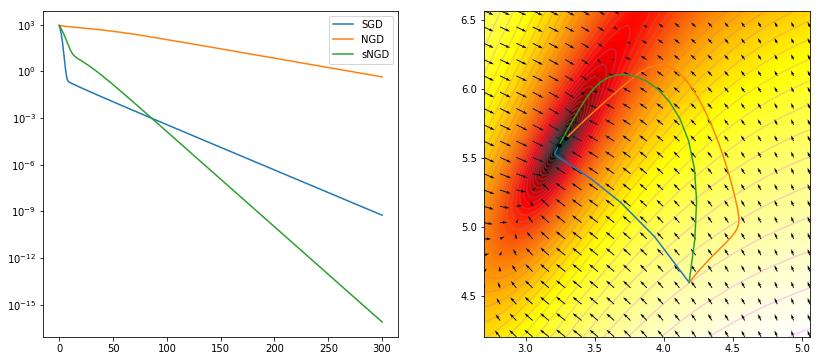

In [6]:
seed = 6107 #int(1e5*np.random.rand(1))
# w0 = np.array([7.1, 4.13])
w0 = np.array([4.184525334284856, 4.597896484375])
noise = 0

qs = [0.0, 1.0, 0.5]; 
# qs = [0.0, 1.0, 0.35]; 
lrs = np.array([0.0016, 0.01*5, 0.03])/4
dampings = [0, 0.1, 0.0001]
epss = [10,10,10]

l, w = run_all(iter = 300, idx =  0, OED_solver =  None, rotate=False)


In [ ]:
fnc = partial(landscape, freq = None, amp = None, py = np, eps = eps, seed = seed)
w_range = [0,1]

x_grid = np.linspace(0, 10, 31)
fig = plt.figure(figsize=(8,8))
# plot_3d(fig, fnc, x_grid)

# np.einsum('ijk,jlk->ilk',array(z_sc),array(sc_y))

w0 =  [8.       4.134471]  lr =  [0.0004 0.0025 0.01  ]  noise =  0.1  seed =  6107


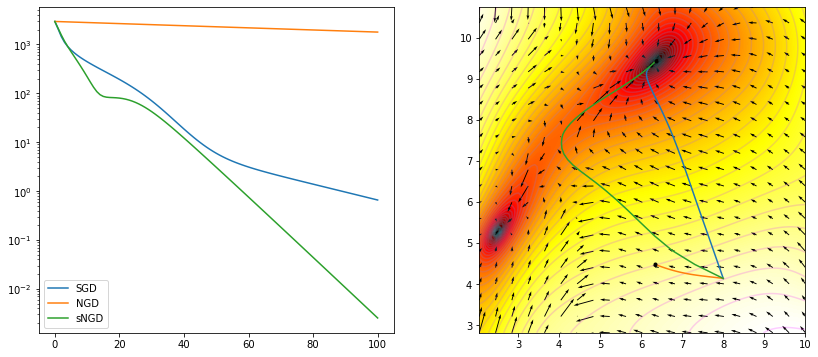

In [257]:
seed = 6107 #int(1e5*np.random.rand(1))
w0 = np.array([8, 4.134471])
noise = 0.1

qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0016, 0.01, 0.04])/4*1
# dampings = [0, 2, 0.001]
dampings = [0, 0.0001, 0]
epss = np.array([100, 0.1, 10])  

l, w = run_all(iter = 100, idx = 1, OED_solver = None, rotate=False)  #, rotate = True)


### Can I plot the jacobian?

In [11]:
np.diag(d)

array([[3., 0.],
       [0., 1.]])

In [20]:
def reconstructSvd(U, d, V):
    return U @ np.diag(d) @ V

In [46]:
jac = np.array([[1,4],[2,1]])
U,d,V = np.linalg.svd(jac)

## hmm

In [47]:
q = 1
dq = d * (d**(-2 * q))
jac2 = reconstructSvd(U, dq, V)

w0 =  [19.8   1.89]  lr =  [0.0002   0.000625 0.00375 ]  noise =  0.1  seed =  12216


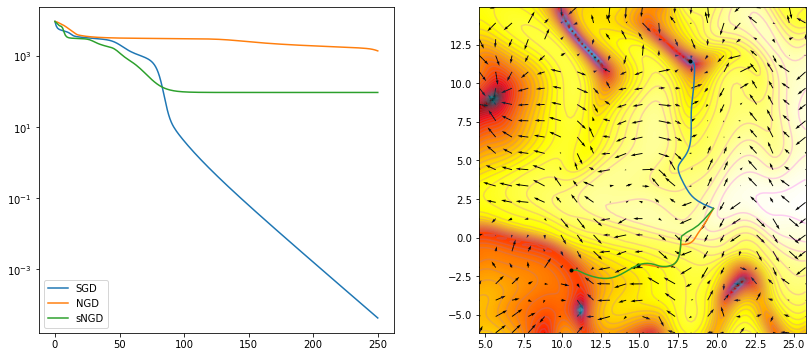

In [163]:
seed = 12216
np.random.randn(3)
w0 = np.array([19.8,  1.89]) 
eps = 0.1

qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0016, 0.01/2, 0.03])/4/2
dampings = [0, 50, 0.0001]


# run_all(iter = 300)

l_all, w_all = run_all(iter = 250, idx=1, OED_solver = 'odeint')

In [27]:
d

array([3., 1.])

In [26]:
dq

array([0.333333, 1.      ])

In [25]:
dq

array([0.333333, 1.      ])

In [48]:
jac2

array([[-0.142857,  0.285714],
       [ 0.571429, -0.142857]])

In [ ]:
# const dq = nj.multiply(d, nj.power(d, -2 * this.op.q))

w0 =  [19.8   1.89]  lr =  [0.0002   0.000625 0.0025  ]  noise =  0.1  seed =  12216


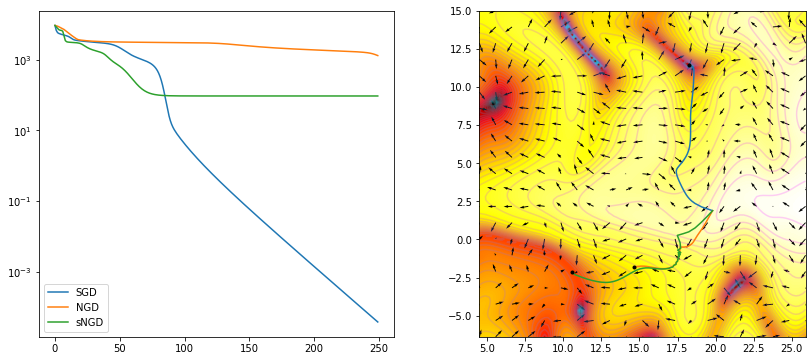

In [116]:
seed = 12216
np.random.randn(3)
w0 = np.array([19.8,  1.89]) 
eps = 0.1

qs = [0.0, 1.0, 0.45]; 
lrs = np.array([0.0016, 0.01/2, 0.02])/4/2
dampings = [0, 50, 1]


# run_all(iter = 300)

l_all, w_all = run_all(iter = 250, idx=2)

In [29]:
jac

array([[1, 2],
       [2, 1]])

In [23]:
jac2

array([[1., 2.],
       [2., 1.]])

w0 =  [16.39411   0.187047]  lr =  [8.0e-05 7.5e-04 1.0e-03]  noise =  0.1  seed =  2355


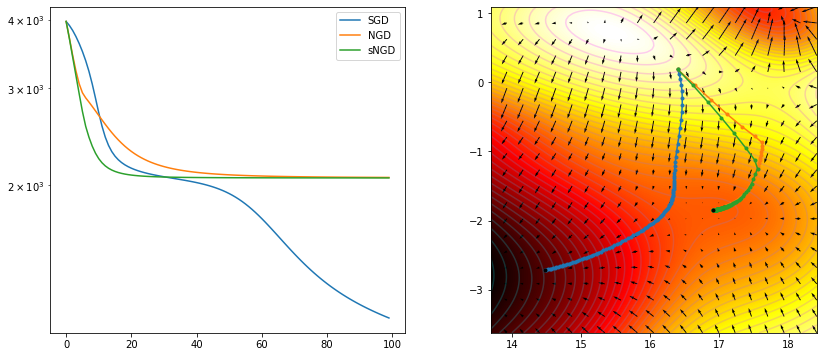

In [61]:
seed = 2355;
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0016, 0.015, 0.02])/10/2; 
eps = 0.1;
# dampings = [0, 300, 15*4]
dampings = [0, 100, 15*1]


np.random.randn(3)
w0 = np.array([16.21833723,  0.08197838]) + 0.1 * np.random.randn(2)

l_alls, w_alls = run_all(iter = 100, idx = 0)

# print(w_alls[2][:,-3:-1])

w0 =  [17.090013 -9.730281]  lr =  [0.0004 0.015  0.015 ]  noise =  0.1  seed =  12125


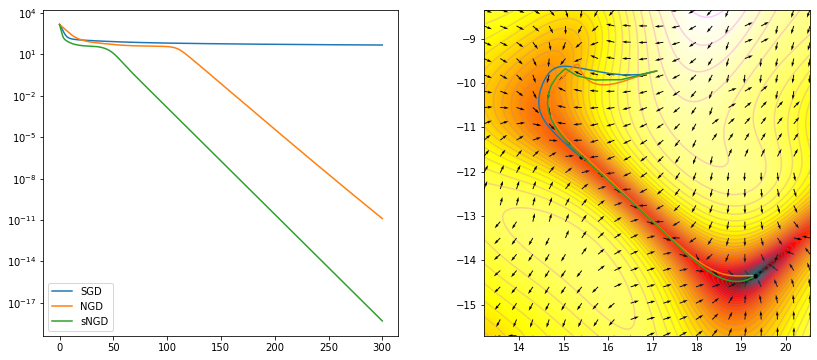

In [61]:
seed = 12125
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0016, 0.06, 0.06])/4
dampings = [0., 4., 0.]

w0 = np.array([17.09001307, -9.73028108]) + 0 * np.random.randn(2)

l, w = run_all(iter = 300, idx=2) #, OED_solver = 'odeint')

w0 =  [39. 32.]  lr =  [5.0e-05 5.0e-04 2.5e-03]  noise =  0.1  seed =  27589


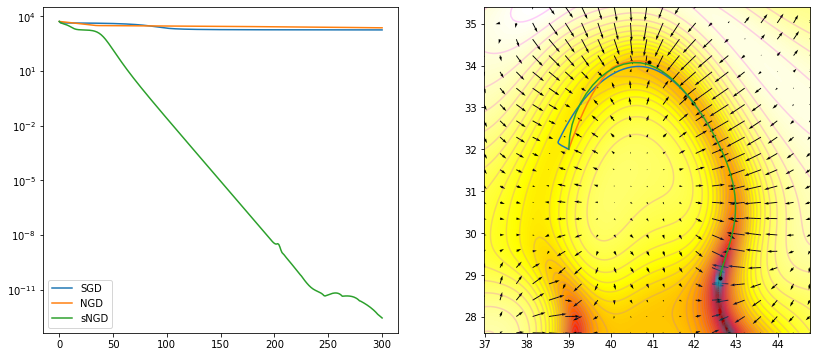

In [63]:
qs = [0.0, 1.0, 0.45]; lrs = np.array([0.0016/8, 0.01/5, 0.01])/4; momentums = None
eps = 0.1
seed = 27589
w0 = np.array([39, 32]) + 0 * np.random.randn(2)

# dampings = [0., 460., 10]
dampings = [0., 16., 0.01]

l, w = run_all(iter = 300, idx = 0, OED_solver = 'odeint')

w0 =  [39.12839  32.231853]  lr =  [5.0e-05 5.0e-04 2.5e-03]  noise =  0.1  seed =  27589


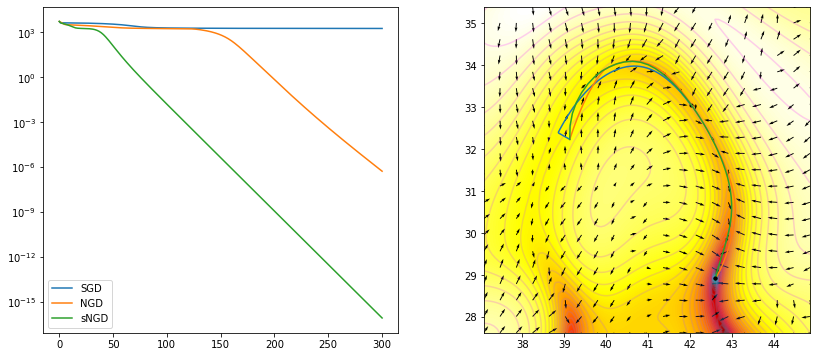

In [64]:
qs = [0.0, 1.0, 0.45]; lrs = np.array([0.0016/8, 0.01/5, 0.01])/4; momentums = None
eps = 0.1
seed = 27589
w0 = np.array([39.1283903, 32.23185338]) + 0 * np.random.randn(2)
# w0 = np.array([37.91283903, 32.23185338]) + 0 * np.random.randn(2)

# dampings = [0., 460., 10]
dampings = [0., 160., 0]

l, w = run_all(iter = 300, idx = 2)

w0 =  [-3.078412 22.187199]  lr =  [0.00025 0.0025  0.005  ]  noise =  0.1  seed =  79320


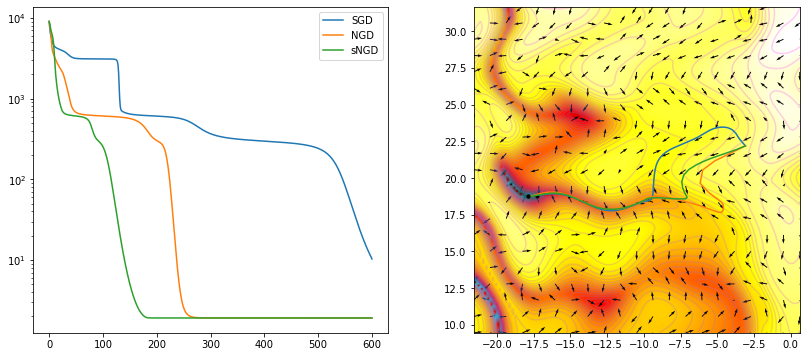

In [58]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.001, 0.01, 0.02])/4

dampings = [0., 60., 0.01]

eps = 0.1
seed = 79320
np.random.randn(1)
w0 = np.array([-3.07841173, 22.1871992])  

l ,w = run_all(iter = 600, OED_solver = 'odeint', idx=2)

In [15]:
jac

array([[1, 2],
       [2, 1]])

w0 =  [-3.078412 22.187199]  lr =  [0.00025 0.0025  0.005  ]  noise =  0.1  seed =  79320


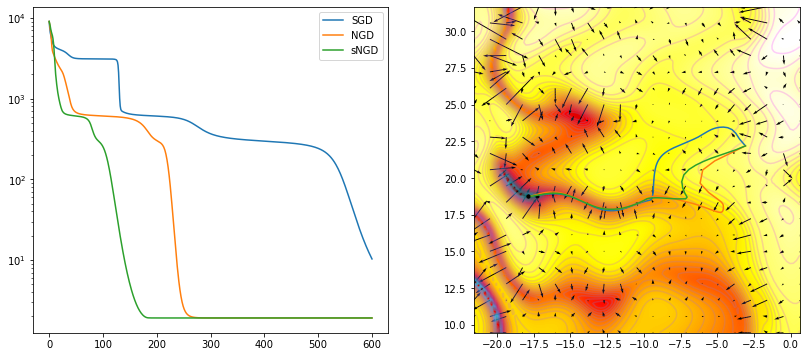

In [173]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.001, 0.01, 0.02])/4

dampings = [0., 60., 0.01]

eps = 0.1
seed = 79320
np.random.randn(1)
w0 = np.array([-3.07841173, 22.1871992])  

l ,w = run_all(iter = 600, OED_solver = 'odeint')

w0 =  [-3.078412 22.187199]  lr =  [0.00025 0.0025  0.005   0.0075 ]  noise =  0.1  seed =  79320


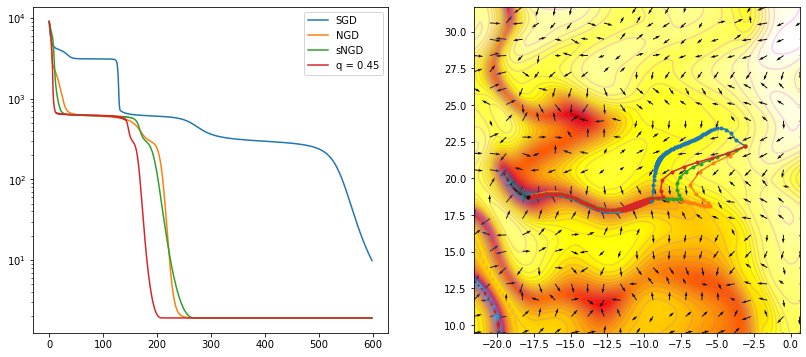

In [102]:
legend = ['SGD', 'NGD', 'sNGD']; 
qs = [0.0, 1.0, 0.50, 0.45]; 
lrs = np.array([0.001, 0.01, 0.02, 0.03])/4

dampings = [0., 60., 0.1, 0]

eps = 0.1
seed = 79320
np.random.randn(1)
w0 = np.array([-3.07841173, 22.1871992])  

l ,w = run_all(iter = 600, idx = 3)

In [10]:
dq

array([3., 1.])

w0 =  [25.093898 17.768443]  lr =  [7.5e-05 2.5e-03 7.5e-03]  noise =  0.1  seed =  65071


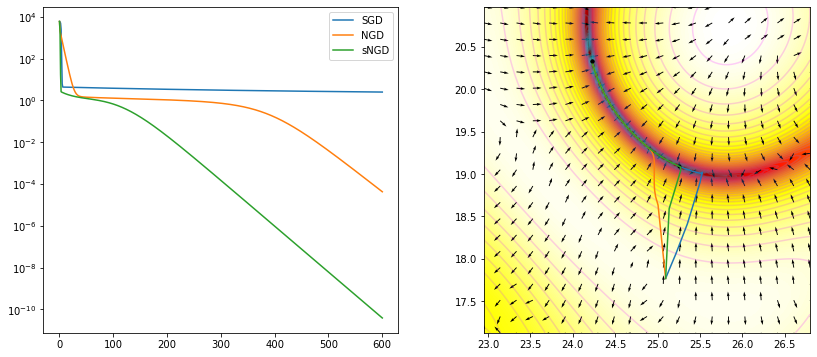

In [67]:
seed = 65071
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0003, 0.01, 0.03])/4
dampings = [0., 50., 0.01]
w0 = np.array([25.09389783, 17.76844296]) 

l, w = run_all(iter = 600, idx=2)

w0 =  [22.527182  8.971678]  lr =  [0.0005 0.006  0.01  ]  noise =  0.1  seed =  58371


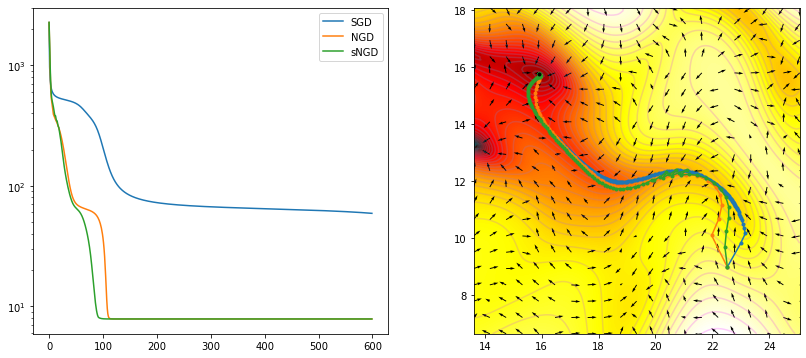

In [70]:
seed = 58371
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0005, 0.006, 0.01])
dampings = [0., 60., 0.1]

w0 = np.array([22.52718249, 8.97167795]) 

l, w = run_all(iter = 600, idx=2)

w0 =  [0.229358 8.890468]  lr =  [0.0003 0.005  0.0075]  noise =  0.1  seed =  93789


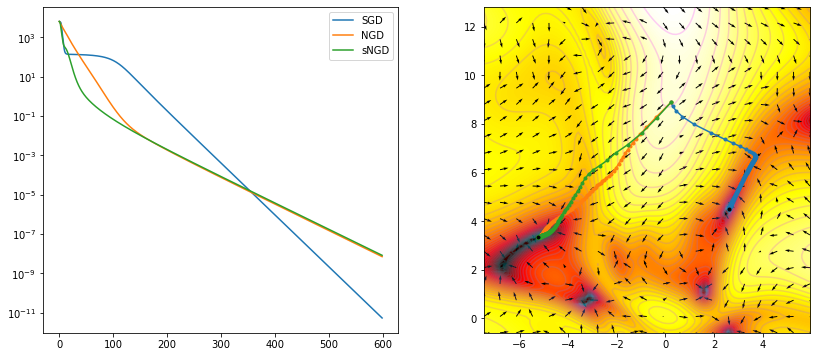

In [71]:
seed = 93789
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.0012, 0.02, 0.03])/4
dampings = [0., 10., 0.1]

w0 = np.array([0.22935811, 8.89046846])

l ,w = run_all(iter = 600, idx=2)

w0 =  [13.457859  9.118802]  lr =  [0.0005 0.005  0.005 ]  noise =  0.1  seed =  30092


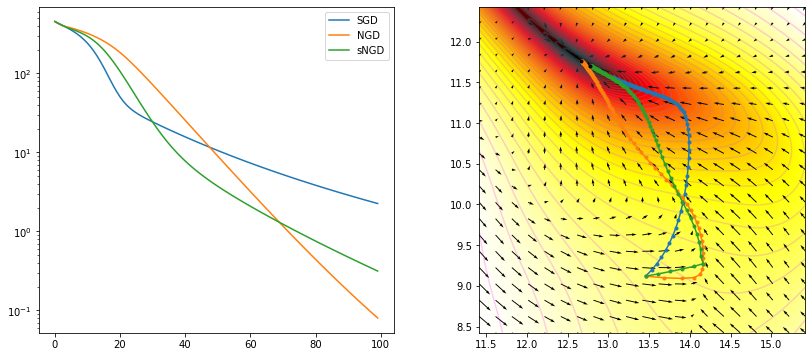

In [72]:
seed = 30092 #int(1e5*np.random.rand(1))
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.002, 0.02, 0.02])/4
dampings = [0., 10., 0.1]
w0 = np.array([13.45785866,  9.1188017])

l, w = run_all (idx = 1)


w0 =  [ 1.       -2.307037]  lr =  [0.0005 0.005  0.005 ]  noise =  0.1  seed =  54780


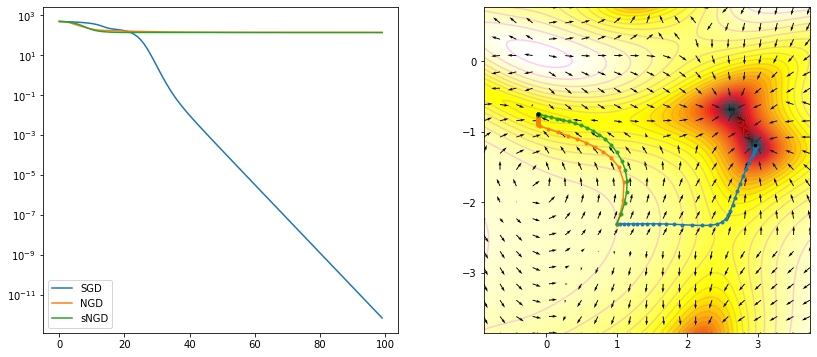

In [73]:
seed = 54780 # int(1e5*np.random.rand(1))
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.002, 0.02, 0.02])/4
dampings = [0., 10., 0.1]
w0 = np.array([1, -2.30703698])

l, w = run_all (idx = 2)

w0 =  [17.5 12.5]  lr =  [0.0005 0.005  0.005 ]  noise =  0.1  seed =  77329


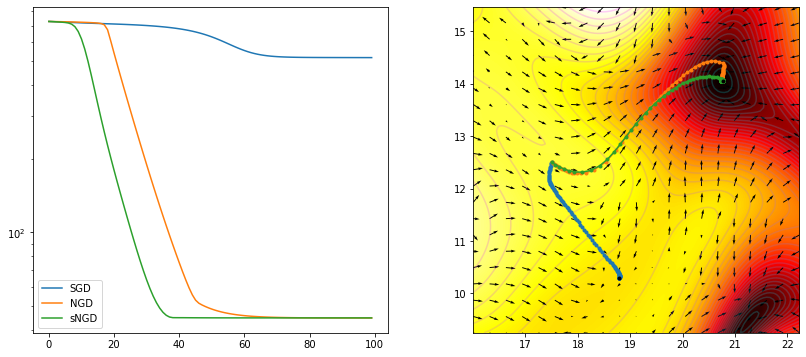

In [74]:
seed = 77329
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.002, 0.02, 0.02])/4
dampings = [0., 10., 0.1]
w0 = np.array([17.5, 12.5])

l, w = run_all (idx = 2)

w0 =  [ 4.8 25.3]  lr =  [0.00025 0.0075  0.01   ]  noise =  0.1  seed =  97639


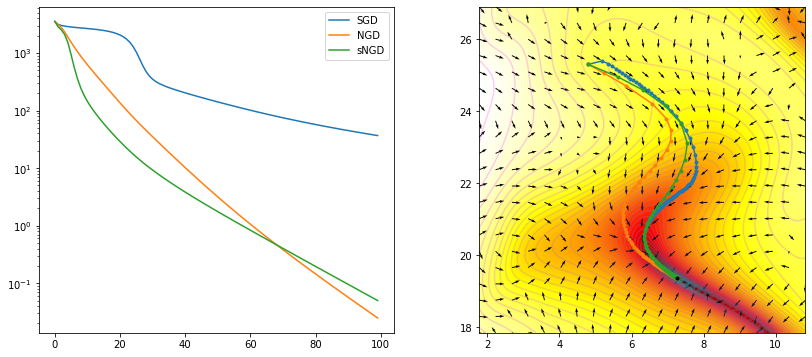

In [75]:
seed =  97639
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.001, 0.03, 0.04])/4
dampings = [0., 10., 0.1]
w0 = np.array([4.8, 25.3])

l, w = run_all (idx = 2)

w0 =  [ 0.53     11.364312]  lr =  [0.00025 0.00125 0.00375]  noise =  0.1  seed =  97639


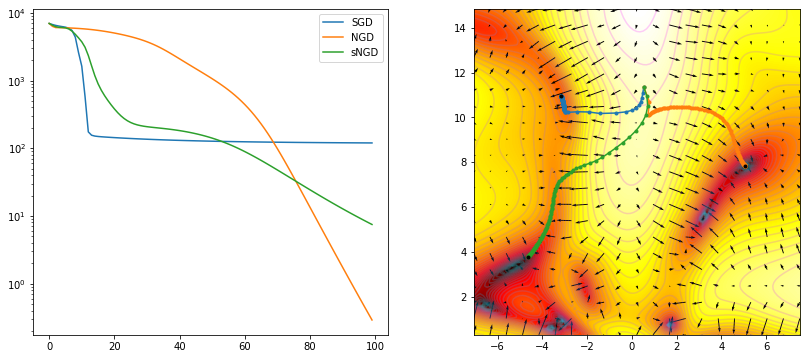

In [83]:
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.002, 0.01, 0.03])/4/2
dampings = [0., 100., 0.]
w0 = np.array([0.53, 11.36431193])

l, w = run_all (eps=0, idx = 0)

w0 =  [ 0.53     11.364312]  lr =  [0.00025 0.00125 0.00375]  noise =  0.1  seed =  97639


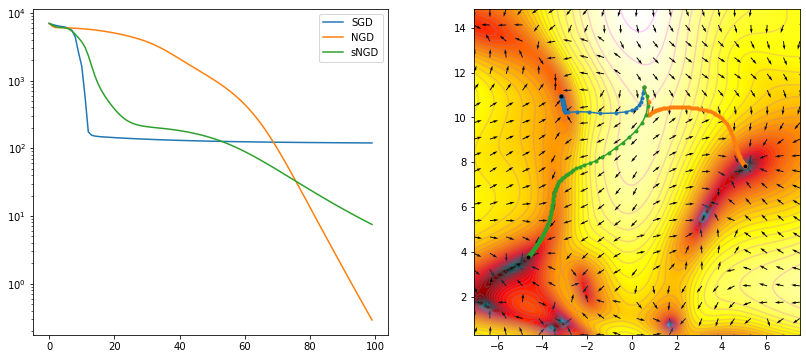

In [76]:
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.002, 0.01, 0.03])/4/2
dampings = [0., 100., 0.]
w0 = np.array([0.53, 11.36431193])

l, w = run_all (eps=0, idx = 2)

w0 =  [-7.44 21.69]  lr =  [0.00025 0.0025  0.005  ]  noise =  0.1  seed =  97639


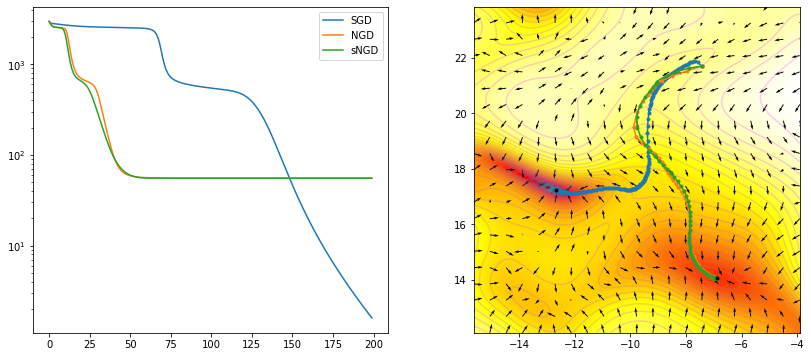

In [77]:
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.001, 0.01, 0.02])/4/1
dampings = [0., 50., 0.5]
w0 = np.array([-7.44, 21.69])

l, w = run_all (eps=0, iter = 200, idx = 2)

w0 =  [13.34 -4.89]  lr =  [0.00025 0.0025  0.005  ]  noise =  0.1  seed =  97639


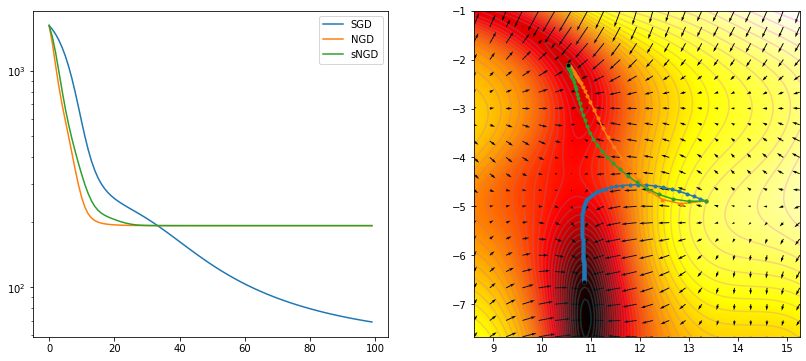

In [82]:
qs = [0.0, 1.0, 0.5]; 
lrs = np.array([0.001, 0.01, 0.02])/4/1
dampings = [0., 50., 0.5]
w0 = np.array([13.34, -4.89])

l, w = run_all (eps=0, idx = 0)